<a href="https://colab.research.google.com/github/DanielPonttes/Minicurso-SACOMP---Redes-Neurais/blob/main/Classificador_Cachorro_Vs_Gato_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importação de Dataset

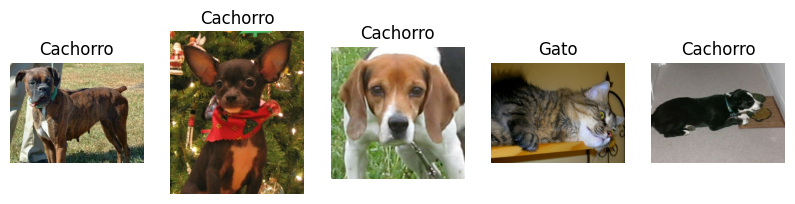

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

dataset, info = tfds.load('cats_vs_dogs', with_info=True, as_supervised=True)
train_data = dataset['train']

plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(train_data.take(5)):
    plt.subplot(1, 5, i + 1)
    plt.imshow(image.numpy())
    plt.title('Gato' if label.numpy() == 0 else 'Cachorro')
    plt.axis('off')
plt.show()

#  Separar treino e validação



In [ ]:
train_size = 0.8  # 80% treino, 20% validação
total_size = info.splits['train'].num_examples
train_count = int(train_size * total_size)

train_data = dataset['train'].take(train_count)
val_data = dataset['train'].skip(train_count)

# Pré-processamento de Dados

## Normalização e Redimensionamento

Função de redimensionamento e normalização dos dados

In [ ]:
IMG_SIZE = 150

def preprocess(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))  # Redimensiona
    image = image / 255.0  # Normaliza
    return image, label

Aplicação no Dataset


In [ ]:
BATCH_SIZE = 32

train_data = (train_data
              .map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
              .shuffle(1000)
              .batch(BATCH_SIZE)
              .prefetch(tf.data.AUTOTUNE))

val_data = (val_data
            .map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
            .batch(BATCH_SIZE)
            .prefetch(tf.data.AUTOTUNE))


# CNN -  Criação e Treinamento

Modelo Criado com pooling e RElU,além da função sigmoid(avalição binária)

In [ ]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Saída binária
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model.fit(train_data,
                    epochs=5,
                    validation_data=val_data)


Epoch 1/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 48s 77ms/step - accuracy: 0.5873 - loss: 0.6776 - val_accuracy: 0.7064 - val_loss: 0.5555
Epoch 2/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 42s 70ms/step - accuracy: 0.7512 - loss: 0.5093 - val_accuracy: 0.7384 - val_loss: 0.5243
Epoch 3/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 82s 71ms/step - accuracy: 0.7971 - loss: 0.4402 - val_accuracy: 0.8165 - val_loss: 0.4132
Epoch 4/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 44s 75ms/step - accuracy: 0.8359 - loss: 0.3664 - val_accuracy: 0.8326 - val_loss: 0.3769
Epoch 5/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 82s 74ms/step - accuracy: 0.8745 - loss: 0.2952 - val_accuracy: 0.8122 - val_loss: 0.4356


In [ ]:
loss, acc = model.evaluate(val_data)
print(f"Acurácia: {acc*100:.2f}%")

146/146 ━━━━━━━━━━━━━━━━━━━━ 20s 33ms/step - accuracy: 0.8136 - loss: 0.4305
Acurácia: 81.22%


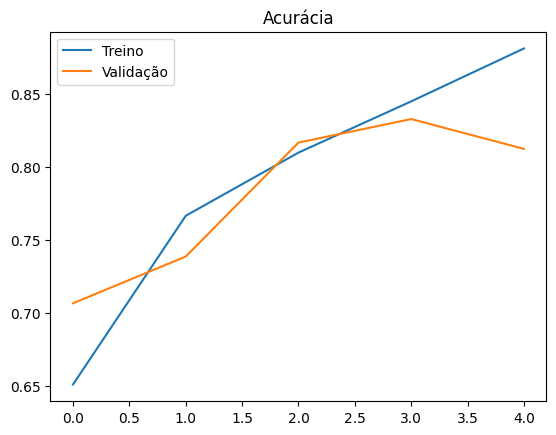

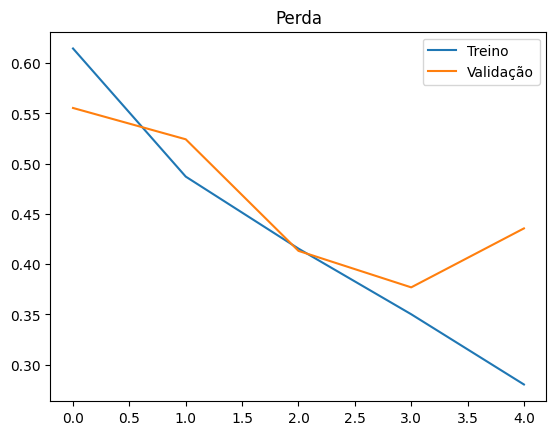

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Treino')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.title('Acurácia')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Treino')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Perda')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


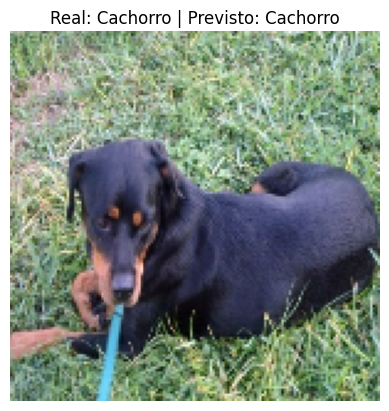

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


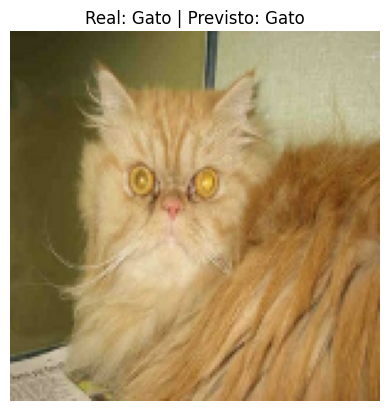

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


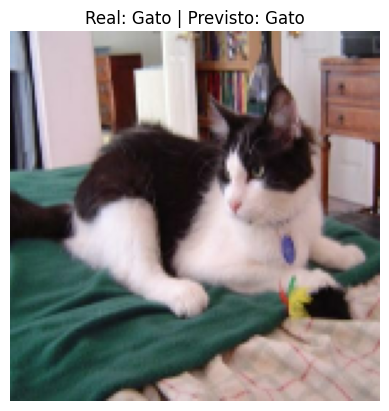

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


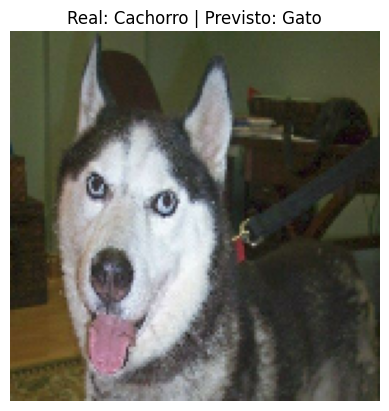

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


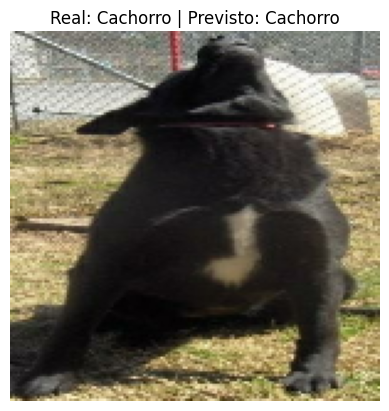

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


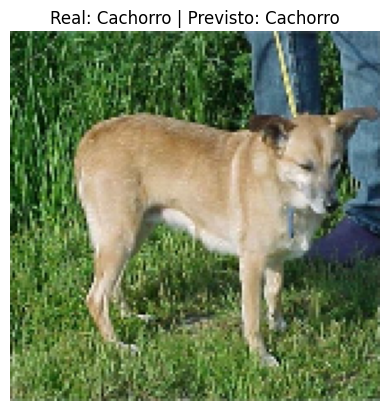

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


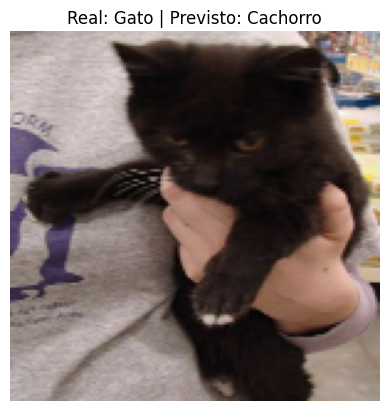

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


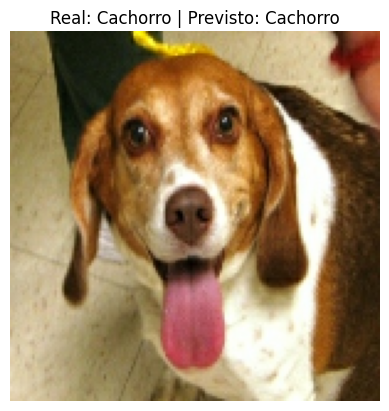

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


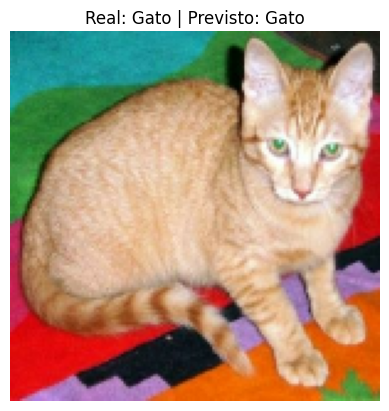

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


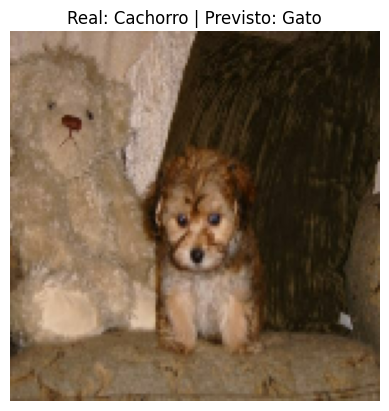

In [ ]:
import matplotlib.pyplot as plt
import random

# Pega um batch do conjunto de validação
for images, labels in val_data.take(10):
    preds = model.predict(images)

    # Escolhe índice aleatório do batch
    idx = random.randint(0, images.shape[0] - 1)

    plt.imshow(images[idx].numpy())
    real_label = 'Gato' if labels[idx] == 0 else 'Cachorro'
    pred_label = 'Cachorro' if preds[idx] > 0.5 else 'Gato'
    plt.title(f"Real: {real_label} | Previsto: {pred_label}")
    plt.axis('off')
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


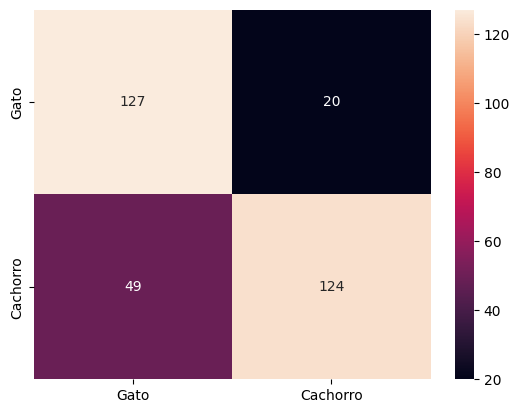

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np


y_true = []
y_pred = []

for images, labels in val_data.take(10):  # subset para não pesar
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend((preds > 0.5).astype(int))

cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['Gato', 'Cachorro'], yticklabels=['Gato', 'Cachorro'])
plt.show()

(3, 3, 3, 32)


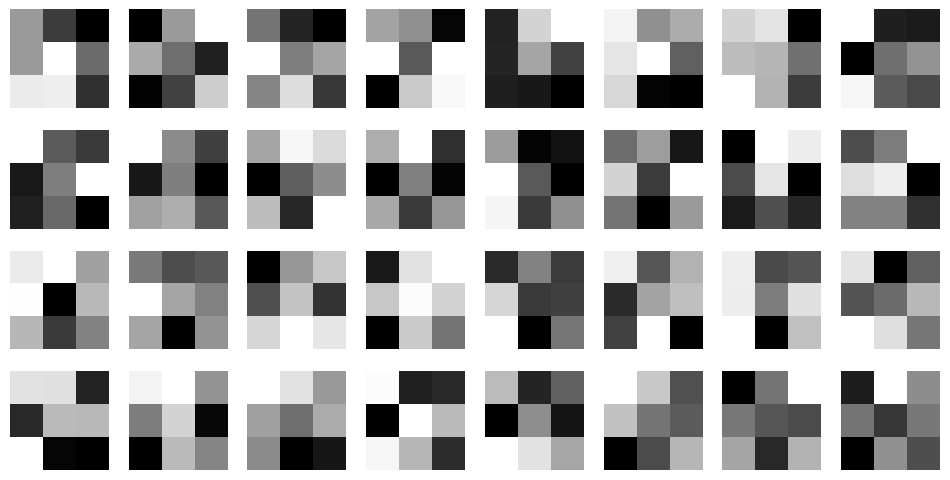

In [ ]:
first_layer_weights = model.layers[0].get_weights()[0]  # filtros da primeira camada Conv2D
print(first_layer_weights.shape)  # (3, 3, 3, 32)

# Mostrar os primeiros filtros
fig, axes = plt.subplots(4, 8, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(first_layer_weights[:, :, 0, i], cmap='gray')
    ax.axis('off')
plt.show()
